In [153]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Лабораторная 3_1

### Предобработка данных


Пункты 1,2 и 5

In [154]:
df=pd.read_csv('Titanic.csv', index_col='PassengerId')
data_count=df.notna().sum().sum()
print('Количество данных до чистки:', data_count)

df.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

print('Количество данных после чистки:', df.notna().sum().sum(),'\nПроцент потерянных данных:', (data_count-df.notna().sum().sum())/data_count)

Количество данных до чистки: 8935
Количество данных после чистки: 5696 
Процент потерянных данных: 0.3625069949636262


Пункты 3 и 4

In [183]:
df['Sex']=df['Sex'].replace({'male':0,'female':1}).astype(int)
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2}).astype(int)

### Машинное обучение

In [156]:
X=df.copy()
y=X.pop('Survived')

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(f'Точности предсказаний c Embarked\nROC_AUC:{roc_auc_score(y_test,y_pred)}\nAccuracy:{accuracy_score(y_test,y_pred)}\nF1-score:{f1_score(y_test,y_pred)}')

X_train, X_test, y_train, y_test = train_test_split(X.drop(['Embarked'],axis=1), y, test_size=0.2, random_state=42)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print('--------------------------------')
print(f'Точности предсказаний без Embarked\nROC_AUC:{roc_auc_score(y_test,y_pred)}\nAccuracy:{accuracy_score(y_test,y_pred)}\nF1-score:{f1_score(y_test,y_pred)}')



Точности предсказаний c Embarked
ROC_AUC:0.7816468253968254
Accuracy:0.7972027972027972
F1-score:0.7387387387387387
--------------------------------
Точности предсказаний без Embarked
ROC_AUC:0.7816468253968254
Accuracy:0.7972027972027972
F1-score:0.7387387387387387


Вывод: столбец Embarked на точность модели не влияет

# Лабораторная 3_3

In [158]:
from sklearn.metrics import confusion_matrix, precision_recall_curve,auc,roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score

print(f'Дополнительные метрики\nRecall:{recall_score(y_test,y_pred)}\nPrecision:{precision_score(y_test,y_pred)}\nF1-score:{f1_score(y_test,y_pred)}')

Дополнительные метрики
Recall:0.6507936507936508
Precision:0.8541666666666666
F1-score:0.7387387387387387


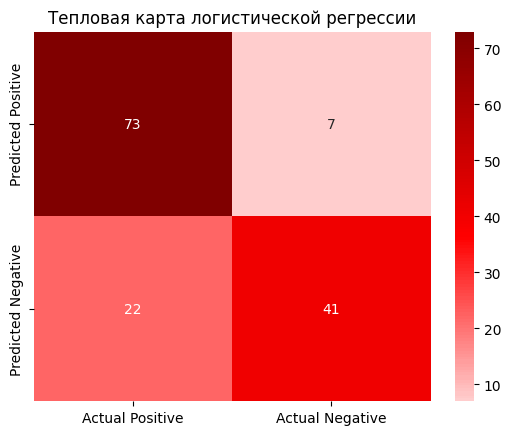

In [159]:
x_labels = ['Actual Positive', 'Actual Negative']
y_labels = ['Predicted Positive', 'Predicted Negative']
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='seismic',center=0,xticklabels=x_labels,yticklabels=y_labels)
plt.title('Тепловая карта логистической регрессии')
plt.show()

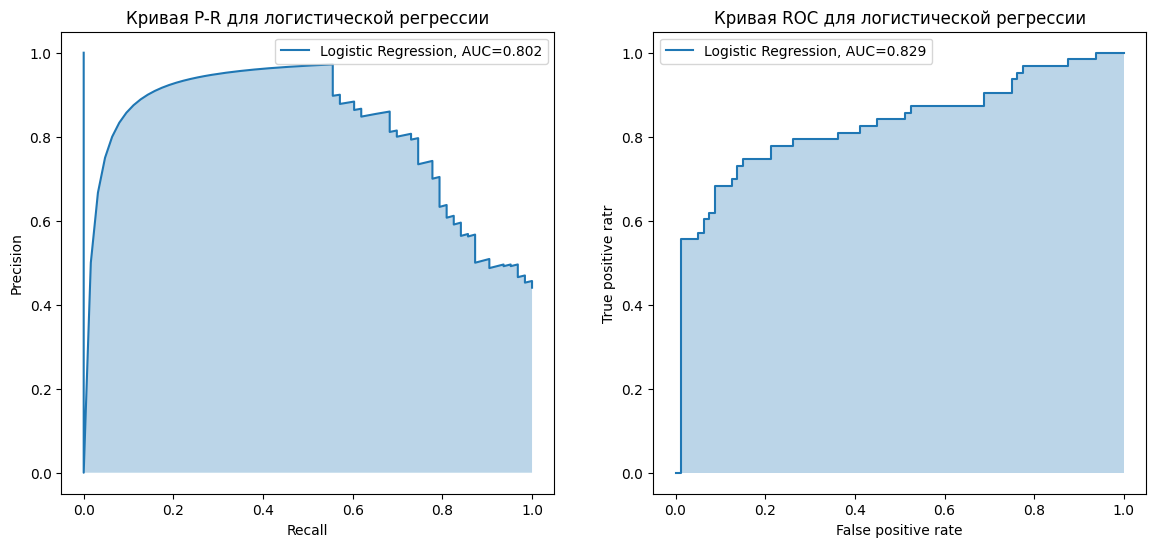

In [160]:
fig,axs=plt.subplots(1,2,figsize=(14,6))

probabilities=clf.predict_proba(X_test)[:,1]

precision, recall, _ =precision_recall_curve(y_test,probabilities)
fpr,tpr,_=roc_curve(y_test,probabilities)

axs[0].plot(recall,precision,label=f'Logistic Regression, AUC={auc(recall,precision):.3f}')
axs[0].fill_between(recall,precision,alpha=0.3)
axs[1].plot(fpr,tpr,label=f'Logistic Regression, AUC={auc(fpr,tpr):.3f}')
axs[1].fill_between(fpr,tpr,alpha=0.3)

axs[0].set_title('Кривая P-R для логистической регрессии')
axs[1].set_title('Кривая ROC для логистической регрессии')

axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[1].set_xlabel('False positive rate')
axs[1].set_ylabel('True positive ratr')

axs[0].legend()
axs[1].legend()
plt.show()

Вывод: так себе, можно лучше

## Сравнение моделей

Стандартизируем X, чтобы работать с SVC и KNN

In [182]:
X=df.copy()
y=X.pop('Survived')
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Embarked'],axis=1), y, test_size=0.2, random_state=42)

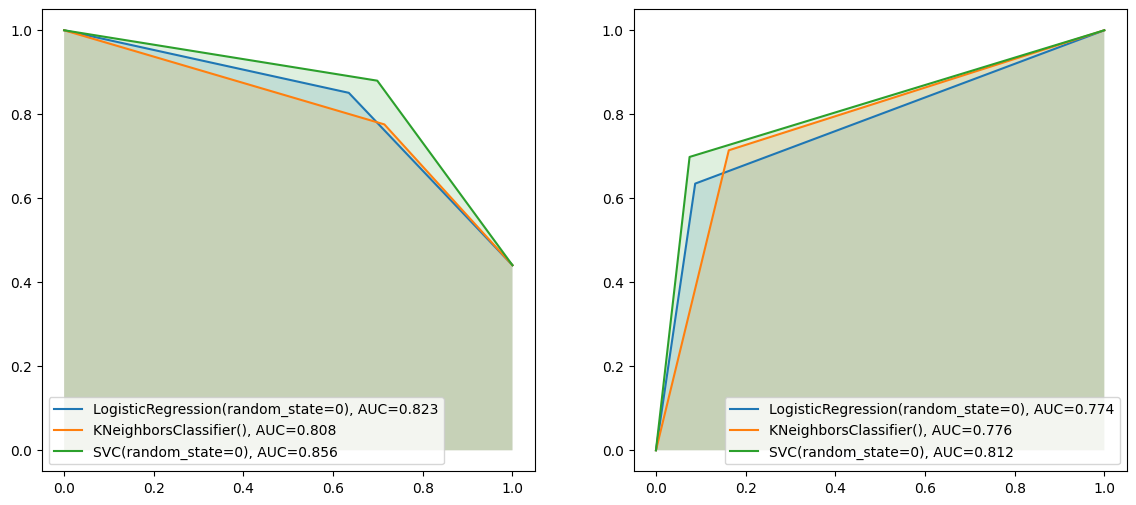

In [181]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
random_st=0
models=[LogisticRegression(random_state=random_st),KNeighborsClassifier(),SVC(random_state=random_st)]

fig,axs=plt.subplots(1,2,figsize=(14,6))

for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    precision, recall, thresholds=precision_recall_curve(y_test,y_pred)
    fpr,tpr,_=roc_curve(y_test,y_pred)

    axs[0].plot(recall,precision,label=f'{model}, AUC={auc(recall,precision):.3f}')
    axs[0].fill_between(recall,precision,alpha=0.15)
    axs[1].plot(fpr,tpr,label=f'{model}, AUC={auc(fpr,tpr):.3f}')
    axs[1].fill_between(fpr,tpr,alpha=0.15)

axs[0].legend()
axs[1].legend()
plt.show()

Точности предсказаний для LogisticRegression(random_state=0):
    ROC_AUC:0.7737103174603175
    Accuracy:0.7902097902097902
    Recall:0.6349206349206349
    Precision:0.851063829787234
    F1-score:0.7272727272727273
-----------------------
Точности предсказаний для KNeighborsClassifier():
    ROC_AUC:0.7758928571428573
    Accuracy:0.7832167832167832
    Recall:0.7142857142857143
    Precision:0.7758620689655172
    F1-score:0.743801652892562
-----------------------
Точности предсказаний для SVC(random_state=0):
    ROC_AUC:0.8117063492063492
    Accuracy:0.8251748251748252
    Recall:0.6984126984126984
    Precision:0.88
    F1-score:0.7787610619469026
-----------------------


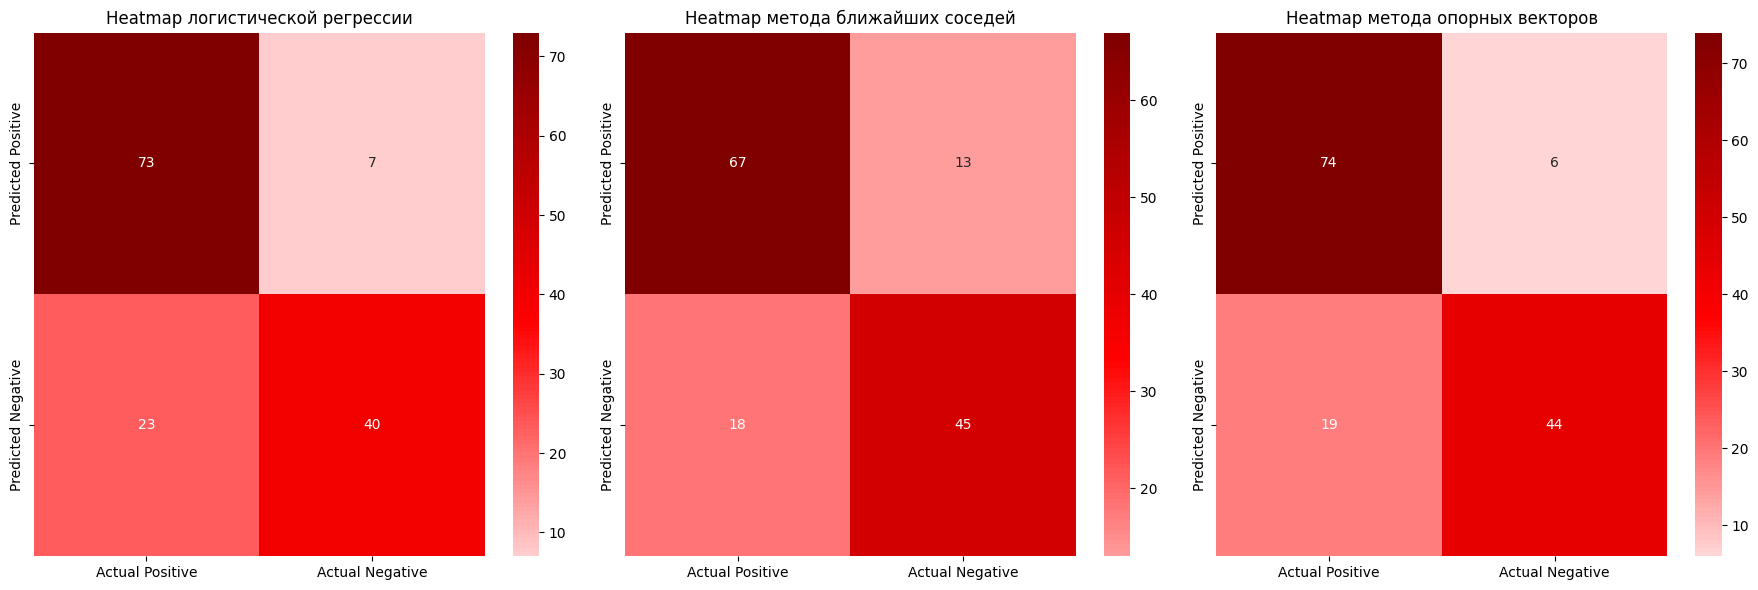

In [179]:
x_labels = ['Actual Positive', 'Actual Negative']
y_labels = ['Predicted Positive', 'Predicted Negative']

fig,axs=plt.subplots(1,3,figsize=(18,6))
i=0

for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='seismic',center=0,xticklabels=x_labels,yticklabels=y_labels,ax=axs[i])
    i+=1
    print(f'''Точности предсказаний для {model}:\n    ROC_AUC:{roc_auc_score(y_test,y_pred)}
    Accuracy:{accuracy_score(y_test,y_pred)}\n    Recall:{recall_score(y_test,y_pred)}
    Precision:{precision_score(y_test,y_pred)}\n    F1-score:{f1_score(y_test,y_pred)}\n-----------------------''')


axs[0].set_title('Heatmap логистической регрессии')
axs[1].set_title('Heatmap метода ближайших соседей')
axs[2].set_title('Heatmap метода опорных векторов')

plt.tight_layout()
plt.show()

Вывод: наилучшим образом справился метод опорных векторов